# Práctica 1 #

Miembros del grupo de prácticas:
- jesus fernandez rueda


## Imports ##

In [ ]:
# Instalación de Optuna utilizando pip
!pip install optuna

# Importar librerias
import sys
import os
import pathlib
import math
import tensorflow as tf;
import tensorflow.python.keras as tfk;
import numpy as np; print(f'Versión de Numpy: {np.__version__}')
import pandas as pd; print(f'Versión de Pandas: {pd.__version__}')
import google.colab as gc; print(f'Version de Google Colab: {gc.__version__}')
import matplotlib as mpl; print(f'Versión de MatPlotLib: {mpl.__version__}')
import sklearn as sk; print(f'Versión de ScikitLearn: {sk.__version__}')
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import optuna


# Importar funciones
from pathlib import Path
from math import ceil
from google.colab import drive
from numpy import abs, logical_and, nan
from pandas import read_csv, DataFrame, get_dummies
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from contextlib import redirect_stdout, redirect_stderr
from io import StringIO
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Dense, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential, layers, callbacks, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.layers import GRU, Dense



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.4 MB/s eta 0:00:00
Versión de Numpy: 1.25.2
Versión de Pandas: 2.0.3
Version de Google Colab: 0.0.1a2
Versión de MatPlotLib: 3.7.1
Versión de ScikitLearn: 1.2.2


## Data ##


### Read dataset ###

In [ ]:
# Leer el conjunto de datos
dataset = pd.read_csv('student-mat.csv', sep=';', decimal='.')

# Verificar Lectura
print(dataset.info())

# Resumen de la estadisticas
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Exploratory Data Analysis (EDA) ###

El análisis exploratorio de datos se realiza para comprender la estructura y distribución de los datos.

### Data pre-processing ###

In [ ]:
#Eliminar los valores faltantes
dataset = dataset.dropna()

# Voy a separa las características de (X) de las etiquetas objetivo (y). Ahora (y) contiene las etiquetas objetivo y (X) contiene todas las características.
X=dataset.drop(columns=['G3'])
Y=dataset[['G3']]
print(X)
print(Y)
columnas_categoricas=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'schoolsup', 'famsup', 'paid', 'higher',  'internet',  'romantic', 'activities', 'nursery', 'reason']
X_OH=pd.get_dummies(X, columns=columnas_categoricas)
X_OH = X_OH.astype(float)
print(X_OH)

# Crear instancia del escalador
scaler=MinMaxScaler()

# Implementar la normalización Min-Max
X_OHnormalized=scaler.fit_transform(X_OH)

# Crear DataFrame con las características
X_OHnormalized_df=pd.DataFrame(X_OHnormalized, columns=X_OH.columns)

# Mostrar el DataFrame que se va a utilizar en los modelos
print(X_OHnormalized_df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... romantic famrel  freetime  goout  Dalc Wal

### Save cleaned dataset ###

In [ ]:
# Crear el nuevo DataFrame
X_OHselected=X_OHnormalized_df

# Guardar el nuevo csv
X_OHselected.to_csv("Datos_en_limpio.csv", index=False)

# Divide los datos en un conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split

# Establece y como la columna 'G3' del DataFrame Y.
y = Y['G3']

#Dividir un conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test=train_test_split(X_OHselected, y, test_size=0.1, random_state=4)

## Artificial Intelligence (AI) ##


### Machine Learning (ML) ###

#### Model ####

#### GBR ####

In [ ]:
# Tasa de aprendizaje
learning_rate=0.1

# Número máximo de estimadores
n_estimators=500

# Configurar la detención temprana
n_iter_no_learning=15

modelo = GradientBoostingRegressor(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=2,
    random_state=50,
    n_iter_no_change=n_iter_no_learning,
    validation_fraction=0.1
)

modelo.fit(X_train, y_train)

resultado=modelo.score(X_test, y_test)
print("Score del modelo: ", resultado)

scores=cross_val_score(modelo, X_train, y_train, cv=5)
print("Puntajes de Validación Cruzada:", scores)
print("Puntaje promedio de Validación Cruzada:", scores.mean())


y_pred = modelo.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
APE=np.abs((y_test - y_pred) / y_test) * 100
MAPE=np.mean(APE)
RMSEGBR=math.sqrt(MSE)

# Representar las predictiones
print('Model predictions')
plt.plot(y_test.values, 'go')
plt.plot(y_pred.flatten(), 'ro')
plt.title('GradientBoostingRegressor')
plt.ylabel('predictions')
plt.xlabel('item')
plt.legend(['real', 'predicted'], loc='upper left')
plt.show()

print(f"RMSE: {RMSEGBR}")
print(f"MSE: {MSE}")
print(f"R2: {R2}")
print(f"MAPE: {MAPE}%")

ModuleNotFoundError: No module named 'shap'

#### KNN ####


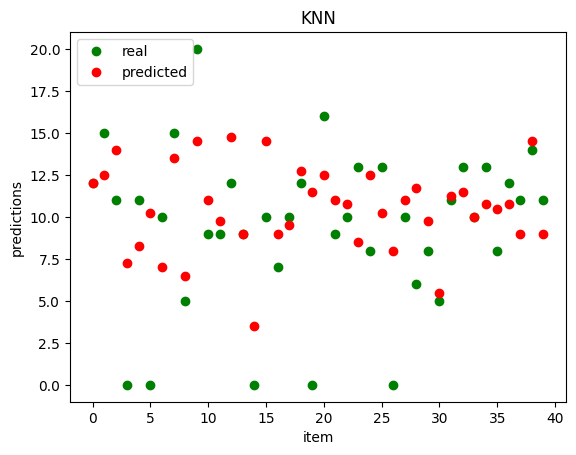

RMSE: 3.858634797438078
MSE: 14.8890625
R2: 0.2892200739945101
MAPE: inf%


In [ ]:
# Crea un modelo KNN
modeloKNN=KNeighborsRegressor(n_neighbors=4, weights='uniform', metric='manhattan', p=2)
modeloKNN.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred=modeloKNN.predict(X_test)

# Calcula métricas de evaluación
MSE=mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
APE = np.abs((y_test - y_pred) / y_test) * 100
MAPE = np.mean(APE)
RMSEKNN = np.sqrt(MSE)

# Representa las predicciones
plt.plot(y_test.values, 'go')
plt.plot(y_pred, 'ro')
plt.title('KNN')
plt.ylabel('predictions')
plt.xlabel('item')
plt.legend(['real', 'predicted'], loc='upper left')
plt.show()

print(f"RMSE: {RMSEKNN}")
print(f"MSE: {MSE}")
print(f"R2: {R2}")
print(f"MAPE: {MAPE}%")


#### Ridge Regressor ####

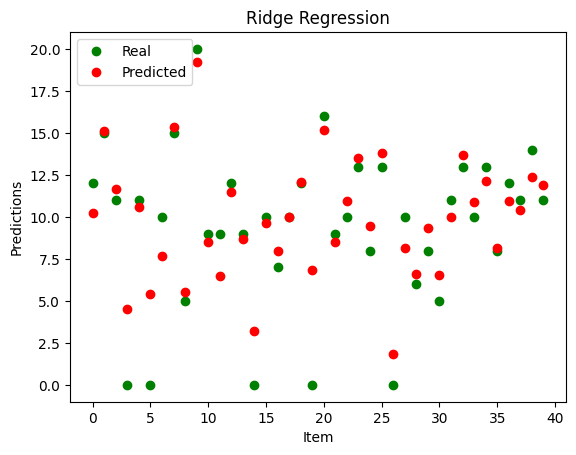

RMSE: 1.9306152765726488
MSE: 3.727275346135685
R2: 0.8220658624592107
MAPE: inf%


In [ ]:
# Entrenar el modelo Ridge
model_ridge = Ridge(
    alpha=1.0
)
model_ridge.fit(X_train, y_train)

y_pred = model_ridge.predict(X_test)

# Calcula métricas de evaluación
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
APE = np.abs((y_test - y_pred) / y_test) * 100
MAPE = np.mean(APE)
RMSERIDGE = np.sqrt(MSE)

# Representa las predicciones
plt.plot(y_test.values, 'go')
plt.plot(y_pred, 'ro')
plt.title('Ridge Regression')
plt.ylabel('Predictions')
plt.xlabel('Item')
plt.legend(['Real', 'Predicted'], loc='upper left')
plt.show()

print(f"RMSE: {RMSERIDGE}")
print(f"MSE: {MSE}")
print(f"R2: {R2}")
print(f"MAPE: {MAPE}%")


#### Evaluation ####


#### Hyperparametrization ####

In [ ]:
# Definir hiperparámetros
param_dist = {
    'n_estimators': [10, 30, 60, 250, 400, 1000],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.12],
    'max_depth': [3, 5, 7, 9, 15],
    'min_samples_split': [2, 5, 10, 5],
    'min_samples_leaf': [1, 2, 4, 3],
}

# Configurar el estimador
gb=GradientBoostingRegressor()

# Crear un objeto RandomizedSearchCV
random_search=RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Ajustar RandomizedSearchCV a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener la mejor combinación de hiperparámetros y el modelo ajustado
best_params=random_search.best_params_
best_model=random_search.best_estimator_

# Realizar predicciones
y_pred=best_model.predict(X_test)

# Calcular métricas de rendimiento
MSE=mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
RMSEGBRH=np.sqrt(MSE)

# Mostrar los resultados
print("Mejores hiperparámetros:", best_params)
print(f"RMSE: {RMSEGBRH}")
print(f"R2: {R2}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores hiperparámetros: {'n_estimators': 60, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.12}
RMSE: 1.8130049306957698
R2: 0.8430845266152441


In [ ]:
# Definición de la función objetivo para la optimización de hiperparámetros
def optimize_hyperparameters(trial):
    # Establecimiento de rangos para los hiperparámetros del modelo
    param_n_estimators = trial.suggest_int('n_estimators', 10, 300)
    param_max_depth = trial.suggest_int('max_depth', 2, 32)
    param_min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    param_min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    # Instanciación y configuración del modelo RandomForestRegressor
    model = RandomForestRegressor(
        n_estimators=param_n_estimators,
        max_depth=param_max_depth,
        min_samples_split=param_min_samples_split,
        min_samples_leaf=param_min_samples_leaf,
        random_state=42
    )

    # Entrenamiento del modelo y predicción en el conjunto de prueba
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Cálculo del Mean Squared Error (MSE)
    mse_error = mean_squared_error(y_test, predictions)

    return mse_error

# Creación de un estudio de optimización con Optuna
study = optuna.create_study(direction='minimize')

# Supresión de la salida de consola durante la optimización
with redirect_stdout(StringIO()), redirect_stderr(StringIO()):
    # Ejecución del proceso de optimización
    study.optimize(optimize_hyperparameters, n_trials=100)

# Recuperación y presentación de los mejores hiperparámetros encontrados
best_hyperparameters = study.best_params
print("Mejores hiperparámetros:", best_hyperparameters)


[I 2024-06-14 16:29:10,477] A new study created in memory with name: no-name-dddf2099-fbb3-49bf-8b12-8c9c3eb2d548
[I 2024-06-14 16:29:10,991] Trial 0 finished with value: 22.08723110438854 and parameters: {'n_estimators': 89, 'max_depth': 28, 'min_samples_split': 0.7038269970397114, 'min_samples_leaf': 0.2397842373819759}. Best is trial 0 with value: 22.08723110438854.
[I 2024-06-14 16:29:11,711] Trial 1 finished with value: 22.094467733564375 and parameters: {'n_estimators': 140, 'max_depth': 16, 'min_samples_split': 0.6060240949971213, 'min_samples_leaf': 0.4026556470190693}. Best is trial 0 with value: 22.08723110438854.
[I 2024-06-14 16:29:12,690] Trial 2 finished with value: 15.898747785636937 and parameters: {'n_estimators': 193, 'max_depth': 26, 'min_samples_split': 0.6119917719532436, 'min_samples_leaf': 0.3094087755080891}. Best is trial 2 with value: 15.898747785636937.
[I 2024-06-14 16:29:12,837] Trial 3 finished with value: 10.767873996775517 and parameters: {'n_estimators'

Mejores hiperparámetros: {'n_estimators': 59, 'max_depth': 22, 'min_samples_split': 0.13978237371915675, 'min_samples_leaf': 0.1004938683505292}


### Deep Learning (DL) ###

#### Model ####

#### FNN ####

2/2 [==============================] - 0s 7ms/step
R-squared (FNN): 0.7783441000361192
RMSE: 2.1547939494284347


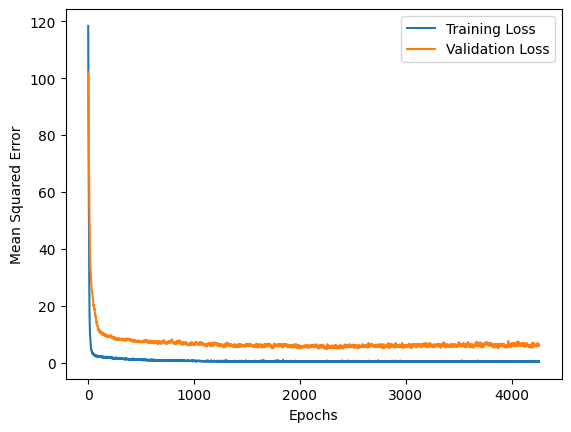

In [ ]:
# FNN
# Definir y compilar el modelo
fnn_model = Sequential()
fnn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
fnn_model.add(BatchNormalization())
fnn_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
fnn_model.add(Dense(1, activation='linear', kernel_regularizer=l2(0.02)))
optimizer = Adam(learning_rate=0.001)
fnn_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2000, restore_best_weights=True)

# Entrenar el modelo - Con 30 bien
history = fnn_model.fit(X_train, y_train, epochs=20000, batch_size=100, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

# Evaluar
fnn_predictions = fnn_model.predict(X_test)
r2_fnn = r2_score(y_test, fnn_predictions)
mse_fnn = mean_squared_error(y_test, fnn_predictions)
print(f'R-squared (FNN): {r2_fnn}')
print(f"RMSE: {np.sqrt(mse_fnn)}")
RMSEFNN = np.sqrt(mse_fnn)

# Historial de entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


#### Bidirectional LSTM -BiLSTM ####

2/2 [==============================] - 1s 9ms/step
Mean Squared Error (BiLSTM): 4.067895479943834
R-squared (BiLSTM): 0.8058052044423518
RMSE (BiLSTM): 2.0169024468089263


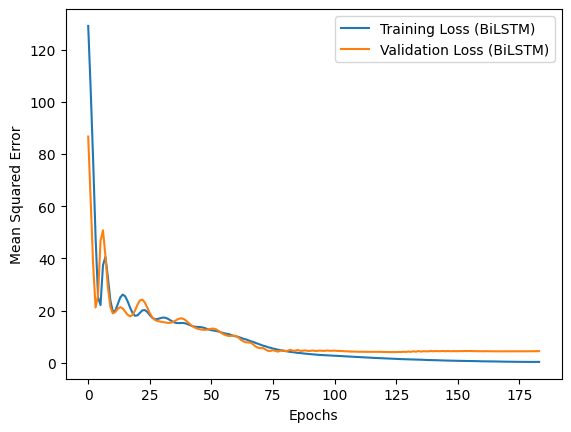

In [ ]:
# Formatear el dataset para pasarlo a 3D
X_train_bilstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_bilstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Crear el modelo secuencial
model_bilstm = Sequential()

# Agregar las capas Bidirectional LSTM al modelo
model_bilstm.add(Bidirectional(LSTM(64, activation='tanh'), input_shape=(1, X_train.shape[1])))
model_bilstm.add(Dense(32, activation='relu'))
model_bilstm.add(Dense(1, activation='linear'))

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)

# Configure the Adam optimizer with a learning rate schedule
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=200, decay_rate=0.4, staircase=True)
custom_optimizer = Adam(learning_rate=lr_schedule)

# Compilar el modelo
model_bilstm.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Entrenar el modelo
history_bilstm = model_bilstm.fit(X_train_bilstm, y_train, epochs=3000, batch_size=3000, validation_data=(X_test_bilstm, y_test), callbacks=[early_stopping], verbose=0)

# Evaluar
bilstm_predictions = model_bilstm.predict(X_test_bilstm)
mse_bilstm = mean_squared_error(y_test, bilstm_predictions)
r2_bilstm = r2_score(y_test, bilstm_predictions)
print(f'Mean Squared Error (BiLSTM): {mse_bilstm}')
print(f'R-squared (BiLSTM): {r2_bilstm}')
print(f'RMSE (BiLSTM): {np.sqrt(mse_bilstm)}')
BILSTM  = np.sqrt(mse_bilstm)

# Historial de entrenamiento
plt.plot(history_bilstm.history['loss'], label='Training Loss (BiLSTM)')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss (BiLSTM)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


#### Gated Recurrent Unit -GRU ####

2/2 [==============================] - 1s 6ms/step
Mean Squared Error (GRU): 3.3776234791952744
R-squared (GRU): 0.838757680907255


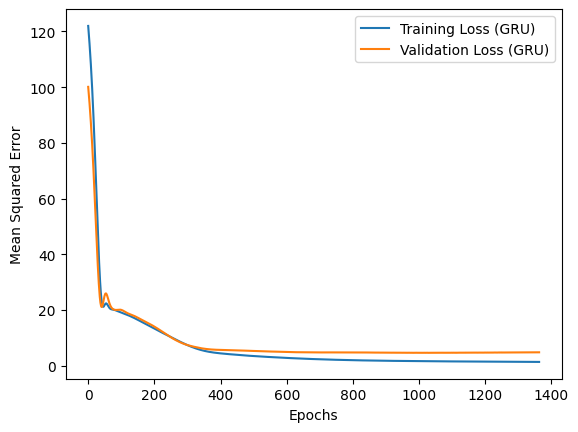

In [ ]:
# Formatear el dataset para pasarlo a 2D
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Definir y compilar el modelo GRU
gru_model = Sequential()
gru_model.add(GRU(32, activation='tanh', input_shape=(1, X_train.shape[1]), kernel_regularizer='l2'))
gru_model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
gru_model.add(Dense(1, activation='linear', kernel_regularizer='l2'))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)

# Entrenar el modelo
history_gru = gru_model.fit(X_train_rnn, y_train, epochs=30000, batch_size=3000, validation_data=(X_test_rnn, y_test), callbacks=[early_stopping], verbose=0)

# Evaluar
gru_predictions = gru_model.predict(X_test_rnn)
mse_gru = mean_squared_error(y_test, gru_predictions)
r2_gru = r2_score(y_test, gru_predictions)
print(f'Mean Squared Error (GRU): {mse_gru}')
print(f'R-squared (GRU): {r2_gru}')
RMSEGRU = np.sqrt(mse_gru)

# Historial de entrenamiento
plt.plot(history_gru.history['loss'], label='Training Loss (GRU)')
plt.plot(history_gru.history['val_loss'], label='Validation Loss (GRU)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


#### Evaluation ####

#### Hyperparametrization ####

In [ ]:
# Define una función para la optimización de hiperparámetros con Optuna
def objective(trial):
    # Define los hiperparámetros a buscar y sus rangos
    n_layers=trial.suggest_int('n_layers', 1, 4)
    n_units=trial.suggest_int('n_units', 32, 256)
    learning_rate=trial.suggest_float('learning_rate', 1e-4, 1e-1)

    # Crear el modelo secuencial
    model = Sequential()

    # Agregar capas ocultas
    for _ in range(n_layers):
        model.add(Dense(n_units, activation='relu'))

    # Capa de salida
    model.add(Dense(1, activation='linear'))

    # Parada temprana
    early_stopping=EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)

    # Configurar el optimizador Adam con la tasa de aprendizaje
    custom_optimizer=Adam(learning_rate=learning_rate)

    # Compilar el modelo
    model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=3000, batch_size=60, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

    # Evaluar el modelo con los datos de prueba
    loss=model.evaluate(X_test, y_test)

    # Devolver la métrica de pérdida para la optimización
    return loss

# Inicializa el estudio Optuna
study=optuna.create_study(direction='minimize')

# Ejecuta la optimización de hiperparámetros
study.optimize(objective, n_trials=100)

# Obtiene los mejores hiperparámetros
best_params=study.best_params
print("Mejores hiperparámetros:", best_params)

[I 2024-06-14 16:33:18,216] A new study created in memory with name: no-name-c5f87fa3-05d6-4e8b-b635-b5ea12ae6619


2/2 [==============================] - 0s 7ms/step - loss: 20.9700


[I 2024-06-14 16:33:23,109] Trial 0 finished with value: 20.969955444335938 and parameters: {'n_layers': 3, 'n_units': 194, 'learning_rate': 0.08083353206108909}. Best is trial 0 with value: 20.969955444335938.


2/2 [==============================] - 0s 6ms/step - loss: 4.8031


[I 2024-06-14 16:33:29,307] Trial 1 finished with value: 4.803118705749512 and parameters: {'n_layers': 3, 'n_units': 54, 'learning_rate': 0.009868803586449659}. Best is trial 1 with value: 4.803118705749512.


2/2 [==============================] - 0s 7ms/step - loss: 2.8340


[I 2024-06-14 16:33:50,669] Trial 2 finished with value: 2.8339715003967285 and parameters: {'n_layers': 2, 'n_units': 208, 'learning_rate': 0.061354363073358655}. Best is trial 2 with value: 2.8339715003967285.


2/2 [==============================] - 0s 6ms/step - loss: 4.2891


[I 2024-06-14 16:33:56,508] Trial 3 finished with value: 4.2891316413879395 and parameters: {'n_layers': 1, 'n_units': 128, 'learning_rate': 0.04709689217886381}. Best is trial 2 with value: 2.8339715003967285.


2/2 [==============================] - 0s 5ms/step - loss: 4.0033


[I 2024-06-14 16:34:01,413] Trial 4 finished with value: 4.0032639503479 and parameters: {'n_layers': 1, 'n_units': 247, 'learning_rate': 0.05330200263032729}. Best is trial 2 with value: 2.8339715003967285.


2/2 [==============================] - 0s 9ms/step - loss: 2.6067


[I 2024-06-14 16:34:15,541] Trial 5 finished with value: 2.606727123260498 and parameters: {'n_layers': 3, 'n_units': 105, 'learning_rate': 0.061855661955154476}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 7ms/step - loss: 3.9075


[I 2024-06-14 16:34:20,826] Trial 6 finished with value: 3.9074699878692627 and parameters: {'n_layers': 1, 'n_units': 248, 'learning_rate': 0.061098616098902554}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 7ms/step - loss: 3.6772


[I 2024-06-14 16:34:26,671] Trial 7 finished with value: 3.6771531105041504 and parameters: {'n_layers': 1, 'n_units': 226, 'learning_rate': 0.06826861517390408}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 7ms/step - loss: 20.9480


[I 2024-06-14 16:34:31,594] Trial 8 finished with value: 20.94803237915039 and parameters: {'n_layers': 4, 'n_units': 66, 'learning_rate': 0.09436616031412391}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 7ms/step - loss: 2.8570


[I 2024-06-14 16:34:40,877] Trial 9 finished with value: 2.8570055961608887 and parameters: {'n_layers': 3, 'n_units': 51, 'learning_rate': 0.06950033000483304}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 7ms/step - loss: 3.8355


[I 2024-06-14 16:34:47,179] Trial 10 finished with value: 3.8354687690734863 and parameters: {'n_layers': 4, 'n_units': 115, 'learning_rate': 0.031046683522131815}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 7ms/step - loss: 3.1004


[I 2024-06-14 16:34:57,582] Trial 11 finished with value: 3.100351333618164 and parameters: {'n_layers': 2, 'n_units': 192, 'learning_rate': 0.03730805055853655}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 10ms/step - loss: 2.8321


[I 2024-06-14 16:35:04,927] Trial 12 finished with value: 2.8320751190185547 and parameters: {'n_layers': 2, 'n_units': 164, 'learning_rate': 0.0837172329203319}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 7ms/step - loss: 20.9557


[I 2024-06-14 16:35:08,964] Trial 13 finished with value: 20.955652236938477 and parameters: {'n_layers': 2, 'n_units': 149, 'learning_rate': 0.0953014075025636}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 9ms/step - loss: 21.0122


[I 2024-06-14 16:35:20,281] Trial 14 finished with value: 21.012161254882812 and parameters: {'n_layers': 3, 'n_units': 95, 'learning_rate': 0.08190526844321465}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 8ms/step - loss: 2.8023


[I 2024-06-14 16:35:31,506] Trial 15 finished with value: 2.8023409843444824 and parameters: {'n_layers': 2, 'n_units': 166, 'learning_rate': 0.07528499617573048}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 7ms/step - loss: 5.3027


[I 2024-06-14 16:35:38,016] Trial 16 finished with value: 5.302719593048096 and parameters: {'n_layers': 4, 'n_units': 91, 'learning_rate': 0.0038537879836920905}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 6ms/step - loss: 2.9603


[I 2024-06-14 16:35:49,990] Trial 17 finished with value: 2.9603471755981445 and parameters: {'n_layers': 3, 'n_units': 161, 'learning_rate': 0.03154887324106563}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 9ms/step - loss: 3.5762


[I 2024-06-14 16:36:00,841] Trial 18 finished with value: 3.576158046722412 and parameters: {'n_layers': 2, 'n_units': 122, 'learning_rate': 0.046791775870950285}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 21ms/step - loss: 3.9232


[I 2024-06-14 16:36:12,581] Trial 19 finished with value: 3.923203945159912 and parameters: {'n_layers': 3, 'n_units': 79, 'learning_rate': 0.01830804759383521}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 8ms/step - loss: 4.0471


[I 2024-06-14 16:36:25,229] Trial 20 finished with value: 4.047116279602051 and parameters: {'n_layers': 2, 'n_units': 33, 'learning_rate': 0.07197246444426747}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 7ms/step - loss: 20.9578


[I 2024-06-14 16:36:29,254] Trial 21 finished with value: 20.957761764526367 and parameters: {'n_layers': 2, 'n_units': 166, 'learning_rate': 0.07969802383786533}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 8ms/step - loss: 2.7142


[I 2024-06-14 16:36:36,163] Trial 22 finished with value: 2.7142441272735596 and parameters: {'n_layers': 2, 'n_units': 177, 'learning_rate': 0.08754483607180526}. Best is trial 5 with value: 2.606727123260498.


2/2 [==============================] - 0s 7ms/step - loss: 2.5491


[I 2024-06-14 16:36:48,403] Trial 23 finished with value: 2.5490949153900146 and parameters: {'n_layers': 2, 'n_units': 141, 'learning_rate': 0.09015068034790888}. Best is trial 23 with value: 2.5490949153900146.


2/2 [==============================] - 0s 7ms/step - loss: 2.8450


[I 2024-06-14 16:36:55,565] Trial 24 finished with value: 2.845012903213501 and parameters: {'n_layers': 3, 'n_units': 104, 'learning_rate': 0.09966562653393302}. Best is trial 23 with value: 2.5490949153900146.


2/2 [==============================] - 0s 7ms/step - loss: 2.2591


[I 2024-06-14 16:37:00,042] Trial 25 finished with value: 2.2590863704681396 and parameters: {'n_layers': 2, 'n_units': 137, 'learning_rate': 0.08967036818605663}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 7ms/step - loss: 3.6119


[I 2024-06-14 16:37:11,020] Trial 26 finished with value: 3.6119372844696045 and parameters: {'n_layers': 1, 'n_units': 132, 'learning_rate': 0.089785761117321}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 8ms/step - loss: 20.9576


[I 2024-06-14 16:37:14,917] Trial 27 finished with value: 20.957592010498047 and parameters: {'n_layers': 3, 'n_units': 137, 'learning_rate': 0.0625376362785388}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 6ms/step - loss: 4.0625


[I 2024-06-14 16:37:27,548] Trial 28 finished with value: 4.062497138977051 and parameters: {'n_layers': 4, 'n_units': 147, 'learning_rate': 0.09186781090514182}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 8ms/step - loss: 3.0478


[I 2024-06-14 16:37:34,835] Trial 29 finished with value: 3.047820568084717 and parameters: {'n_layers': 3, 'n_units': 110, 'learning_rate': 0.07645623838800912}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 7ms/step - loss: 3.0179


[I 2024-06-14 16:37:41,325] Trial 30 finished with value: 3.017857551574707 and parameters: {'n_layers': 2, 'n_units': 184, 'learning_rate': 0.05189030375367529}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 5ms/step - loss: 20.9785


[I 2024-06-14 16:37:47,622] Trial 31 finished with value: 20.978450775146484 and parameters: {'n_layers': 2, 'n_units': 145, 'learning_rate': 0.08507285549593933}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 8ms/step - loss: 2.7190


[I 2024-06-14 16:38:04,627] Trial 32 finished with value: 2.7190213203430176 and parameters: {'n_layers': 2, 'n_units': 182, 'learning_rate': 0.09996803584184163}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 5ms/step - loss: 20.9691


[I 2024-06-14 16:38:08,086] Trial 33 finished with value: 20.969087600708008 and parameters: {'n_layers': 2, 'n_units': 88, 'learning_rate': 0.08709515898811436}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 7ms/step - loss: 3.6644


[I 2024-06-14 16:38:19,435] Trial 34 finished with value: 3.6643567085266113 and parameters: {'n_layers': 3, 'n_units': 207, 'learning_rate': 0.08879594538505628}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 8ms/step - loss: 3.9192


[I 2024-06-14 16:38:25,634] Trial 35 finished with value: 3.9192023277282715 and parameters: {'n_layers': 1, 'n_units': 121, 'learning_rate': 0.06196805156548145}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 7ms/step - loss: 3.0390


[I 2024-06-14 16:38:37,571] Trial 36 finished with value: 3.0390467643737793 and parameters: {'n_layers': 2, 'n_units': 155, 'learning_rate': 0.08020881210901017}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 8ms/step - loss: 4.4860


[I 2024-06-14 16:38:43,518] Trial 37 finished with value: 4.486024379730225 and parameters: {'n_layers': 1, 'n_units': 177, 'learning_rate': 0.06721552287290006}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 10ms/step - loss: 20.9484


[I 2024-06-14 16:38:49,618] Trial 38 finished with value: 20.94839096069336 and parameters: {'n_layers': 2, 'n_units': 206, 'learning_rate': 0.058131687761816146}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 7ms/step - loss: 4.1121


[I 2024-06-14 16:38:53,620] Trial 39 finished with value: 4.112126350402832 and parameters: {'n_layers': 1, 'n_units': 135, 'learning_rate': 0.09433368081666695}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 8ms/step - loss: 3.3452


[I 2024-06-14 16:39:04,960] Trial 40 finished with value: 3.3451740741729736 and parameters: {'n_layers': 3, 'n_units': 236, 'learning_rate': 0.07479566443911584}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 7ms/step - loss: 3.3896


[I 2024-06-14 16:39:16,099] Trial 41 finished with value: 3.389589309692383 and parameters: {'n_layers': 2, 'n_units': 178, 'learning_rate': 0.09980972135655816}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 6ms/step - loss: 2.6761


[I 2024-06-14 16:39:30,553] Trial 42 finished with value: 2.6761486530303955 and parameters: {'n_layers': 2, 'n_units': 196, 'learning_rate': 0.09692167696032612}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 7ms/step - loss: 4.6628


[I 2024-06-14 16:39:36,709] Trial 43 finished with value: 4.662778854370117 and parameters: {'n_layers': 2, 'n_units': 225, 'learning_rate': 0.0925065264448333}. Best is trial 25 with value: 2.2590863704681396.


2/2 [==============================] - 0s 5ms/step - loss: 1.5576


[I 2024-06-14 16:39:54,233] Trial 44 finished with value: 1.557615041732788 and parameters: {'n_layers': 2, 'n_units': 196, 'learning_rate': 0.04377127010721801}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 8ms/step - loss: 2.1914


[I 2024-06-14 16:40:05,114] Trial 45 finished with value: 2.1914219856262207 and parameters: {'n_layers': 2, 'n_units': 221, 'learning_rate': 0.046051597926172014}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 3.6533


[I 2024-06-14 16:40:10,146] Trial 46 finished with value: 3.653315782546997 and parameters: {'n_layers': 1, 'n_units': 223, 'learning_rate': 0.03569829887312161}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 3.5435


[I 2024-06-14 16:40:16,170] Trial 47 finished with value: 3.543506145477295 and parameters: {'n_layers': 2, 'n_units': 238, 'learning_rate': 0.04935010386388814}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 2.7221


[I 2024-06-14 16:40:27,498] Trial 48 finished with value: 2.722114086151123 and parameters: {'n_layers': 3, 'n_units': 104, 'learning_rate': 0.0396749364745969}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 12ms/step - loss: 20.9486


[I 2024-06-14 16:40:33,705] Trial 49 finished with value: 20.94862174987793 and parameters: {'n_layers': 3, 'n_units': 67, 'learning_rate': 0.044741967169928405}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 6ms/step - loss: 4.2128


[I 2024-06-14 16:40:38,415] Trial 50 finished with value: 4.212790489196777 and parameters: {'n_layers': 2, 'n_units': 217, 'learning_rate': 0.020403794409821485}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 14ms/step - loss: 2.9923


[I 2024-06-14 16:40:49,608] Trial 51 finished with value: 2.992265462875366 and parameters: {'n_layers': 2, 'n_units': 190, 'learning_rate': 0.055853050477329115}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 4.4109


[I 2024-06-14 16:40:55,618] Trial 52 finished with value: 4.410857200622559 and parameters: {'n_layers': 2, 'n_units': 198, 'learning_rate': 0.024118612351629737}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 2.9664


[I 2024-06-14 16:41:06,765] Trial 53 finished with value: 2.9664459228515625 and parameters: {'n_layers': 2, 'n_units': 255, 'learning_rate': 0.04397994661015601}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 6ms/step - loss: 3.8107


[I 2024-06-14 16:41:17,886] Trial 54 finished with value: 3.8107120990753174 and parameters: {'n_layers': 2, 'n_units': 197, 'learning_rate': 0.030729032612425336}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 2.8851


[I 2024-06-14 16:41:29,017] Trial 55 finished with value: 2.8850905895233154 and parameters: {'n_layers': 2, 'n_units': 157, 'learning_rate': 0.04220818099281446}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 11ms/step - loss: 2.6341


[I 2024-06-14 16:41:40,209] Trial 56 finished with value: 2.63411545753479 and parameters: {'n_layers': 2, 'n_units': 214, 'learning_rate': 0.095861525812582}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 3.2952


[I 2024-06-14 16:41:46,223] Trial 57 finished with value: 3.295152187347412 and parameters: {'n_layers': 3, 'n_units': 215, 'learning_rate': 0.05475758615898688}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 2.6651


[I 2024-06-14 16:42:01,927] Trial 58 finished with value: 2.6651270389556885 and parameters: {'n_layers': 2, 'n_units': 241, 'learning_rate': 0.035741689342012266}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 20.9559


[I 2024-06-14 16:42:06,398] Trial 59 finished with value: 20.95587730407715 and parameters: {'n_layers': 2, 'n_units': 122, 'learning_rate': 0.06534012168447093}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 3.0734


[I 2024-06-14 16:42:12,921] Trial 60 finished with value: 3.0734305381774902 and parameters: {'n_layers': 4, 'n_units': 214, 'learning_rate': 0.047256239713720144}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 4.0818


[I 2024-06-14 16:42:24,955] Trial 61 finished with value: 4.081762313842773 and parameters: {'n_layers': 2, 'n_units': 241, 'learning_rate': 0.037165229902291715}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 3.6100


[I 2024-06-14 16:42:46,413] Trial 62 finished with value: 3.609968900680542 and parameters: {'n_layers': 2, 'n_units': 231, 'learning_rate': 0.03365305884184011}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 3.9169


[I 2024-06-14 16:42:57,990] Trial 63 finished with value: 3.9168522357940674 and parameters: {'n_layers': 2, 'n_units': 248, 'learning_rate': 0.027158064917247496}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 5.0208


[I 2024-06-14 16:43:04,242] Trial 64 finished with value: 5.020759105682373 and parameters: {'n_layers': 2, 'n_units': 255, 'learning_rate': 0.013900002896277092}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 2.0988


[I 2024-06-14 16:43:11,856] Trial 65 finished with value: 2.098809003829956 and parameters: {'n_layers': 2, 'n_units': 138, 'learning_rate': 0.04066280830635688}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 8ms/step - loss: 3.7709


[I 2024-06-14 16:43:17,151] Trial 66 finished with value: 3.7709147930145264 and parameters: {'n_layers': 1, 'n_units': 143, 'learning_rate': 0.040227284301597395}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 20.9500


[I 2024-06-14 16:43:20,615] Trial 67 finished with value: 20.950023651123047 and parameters: {'n_layers': 2, 'n_units': 130, 'learning_rate': 0.0835084004371035}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 2.8392


[I 2024-06-14 16:43:31,885] Trial 68 finished with value: 2.83919095993042 and parameters: {'n_layers': 3, 'n_units': 112, 'learning_rate': 0.05045959355537363}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 8ms/step - loss: 2.4868


[I 2024-06-14 16:43:46,056] Trial 69 finished with value: 2.4867894649505615 and parameters: {'n_layers': 2, 'n_units': 125, 'learning_rate': 0.05903099448614239}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 21.0964


[I 2024-06-14 16:43:49,670] Trial 70 finished with value: 21.096439361572266 and parameters: {'n_layers': 3, 'n_units': 122, 'learning_rate': 0.05984363705299053}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 3.8934


[I 2024-06-14 16:43:55,664] Trial 71 finished with value: 3.893397569656372 and parameters: {'n_layers': 2, 'n_units': 101, 'learning_rate': 0.04775679015092243}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 20.9759


[I 2024-06-14 16:44:01,679] Trial 72 finished with value: 20.97589111328125 and parameters: {'n_layers': 2, 'n_units': 142, 'learning_rate': 0.06996635380290063}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 12ms/step - loss: 4.0382


[I 2024-06-14 16:44:07,283] Trial 73 finished with value: 4.038221836090088 and parameters: {'n_layers': 2, 'n_units': 152, 'learning_rate': 0.0573777522281248}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 2.5502


[I 2024-06-14 16:44:18,552] Trial 74 finished with value: 2.5502076148986816 and parameters: {'n_layers': 2, 'n_units': 127, 'learning_rate': 0.05223537905014377}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 6ms/step - loss: 2.5515


[I 2024-06-14 16:44:39,850] Trial 75 finished with value: 2.5514614582061768 and parameters: {'n_layers': 2, 'n_units': 117, 'learning_rate': 0.05272146674516448}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 6ms/step - loss: 21.1578


[I 2024-06-14 16:44:45,872] Trial 76 finished with value: 21.15776824951172 and parameters: {'n_layers': 2, 'n_units': 127, 'learning_rate': 0.0519617897079069}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 5ms/step - loss: 4.1556


[I 2024-06-14 16:44:51,898] Trial 77 finished with value: 4.155634880065918 and parameters: {'n_layers': 2, 'n_units': 117, 'learning_rate': 0.04363486017714556}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 3.6685


[I 2024-06-14 16:45:03,036] Trial 78 finished with value: 3.6685497760772705 and parameters: {'n_layers': 2, 'n_units': 141, 'learning_rate': 0.06498831512795317}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 6ms/step - loss: 20.9669


[I 2024-06-14 16:45:09,110] Trial 79 finished with value: 20.966901779174805 and parameters: {'n_layers': 2, 'n_units': 168, 'learning_rate': 0.05259936081330101}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 8ms/step - loss: 3.8215


[I 2024-06-14 16:45:15,278] Trial 80 finished with value: 3.8215432167053223 and parameters: {'n_layers': 1, 'n_units': 135, 'learning_rate': 0.038962371033850654}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 11ms/step - loss: 21.2309


[I 2024-06-14 16:45:21,421] Trial 81 finished with value: 21.23091697692871 and parameters: {'n_layers': 2, 'n_units': 107, 'learning_rate': 0.05403782012108143}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 2.6648


[I 2024-06-14 16:45:43,794] Trial 82 finished with value: 2.6648497581481934 and parameters: {'n_layers': 2, 'n_units': 96, 'learning_rate': 0.059700825035919614}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 8ms/step - loss: 2.7701


[I 2024-06-14 16:45:54,476] Trial 83 finished with value: 2.770143985748291 and parameters: {'n_layers': 2, 'n_units': 115, 'learning_rate': 0.04977034646640089}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 3.5146


[I 2024-06-14 16:45:59,479] Trial 84 finished with value: 3.5145790576934814 and parameters: {'n_layers': 2, 'n_units': 128, 'learning_rate': 0.045817481800857054}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 6ms/step - loss: 5.5709


[I 2024-06-14 16:46:20,974] Trial 85 finished with value: 5.5708909034729 and parameters: {'n_layers': 2, 'n_units': 89, 'learning_rate': 0.0010955118737209224}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 6ms/step - loss: 2.6581


[I 2024-06-14 16:46:32,325] Trial 86 finished with value: 2.658104419708252 and parameters: {'n_layers': 2, 'n_units': 150, 'learning_rate': 0.07412319004800746}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 8ms/step - loss: 3.1889


[I 2024-06-14 16:46:36,381] Trial 87 finished with value: 3.1888515949249268 and parameters: {'n_layers': 2, 'n_units': 137, 'learning_rate': 0.041881422238862154}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 15ms/step - loss: 4.1294


[I 2024-06-14 16:46:42,464] Trial 88 finished with value: 4.129403591156006 and parameters: {'n_layers': 2, 'n_units': 170, 'learning_rate': 0.07895199300293454}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 12ms/step - loss: 2.6988


[I 2024-06-14 16:46:51,533] Trial 89 finished with value: 2.6987533569335938 and parameters: {'n_layers': 3, 'n_units': 82, 'learning_rate': 0.05816783792669857}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 10ms/step - loss: 2.3252


[I 2024-06-14 16:47:03,261] Trial 90 finished with value: 2.3252005577087402 and parameters: {'n_layers': 2, 'n_units': 159, 'learning_rate': 0.05580592440300646}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 2.5870


[I 2024-06-14 16:47:10,640] Trial 91 finished with value: 2.5869855880737305 and parameters: {'n_layers': 2, 'n_units': 160, 'learning_rate': 0.0639931291729885}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 2.8595


[I 2024-06-14 16:47:22,374] Trial 92 finished with value: 2.859496831893921 and parameters: {'n_layers': 2, 'n_units': 156, 'learning_rate': 0.06422733429247798}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 8ms/step - loss: 21.1828


[I 2024-06-14 16:47:25,979] Trial 93 finished with value: 21.18284034729004 and parameters: {'n_layers': 2, 'n_units': 161, 'learning_rate': 0.05653007206540135}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 8ms/step - loss: 20.9798


[I 2024-06-14 16:47:29,653] Trial 94 finished with value: 20.979846954345703 and parameters: {'n_layers': 2, 'n_units': 173, 'learning_rate': 0.04894133255360899}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 2.6987


[I 2024-06-14 16:47:43,195] Trial 95 finished with value: 2.69866943359375 and parameters: {'n_layers': 2, 'n_units': 147, 'learning_rate': 0.05314970228140057}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 9ms/step - loss: 4.0327


[I 2024-06-14 16:47:54,396] Trial 96 finished with value: 4.032654285430908 and parameters: {'n_layers': 2, 'n_units': 188, 'learning_rate': 0.06228470841497405}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 8ms/step - loss: 2.6591


[I 2024-06-14 16:48:15,813] Trial 97 finished with value: 2.659085512161255 and parameters: {'n_layers': 2, 'n_units': 125, 'learning_rate': 0.0917662981920119}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 10ms/step - loss: 3.6706


[I 2024-06-14 16:48:26,960] Trial 98 finished with value: 3.670553684234619 and parameters: {'n_layers': 2, 'n_units': 162, 'learning_rate': 0.04843678040265163}. Best is trial 44 with value: 1.557615041732788.


2/2 [==============================] - 0s 7ms/step - loss: 3.7714


[I 2024-06-14 16:48:31,500] Trial 99 finished with value: 3.7713942527770996 and parameters: {'n_layers': 2, 'n_units': 137, 'learning_rate': 0.06869266784642655}. Best is trial 44 with value: 1.557615041732788.


Mejores hiperparámetros: {'n_layers': 2, 'n_units': 196, 'learning_rate': 0.04377127010721801}


### Comparison between ML - DL ###

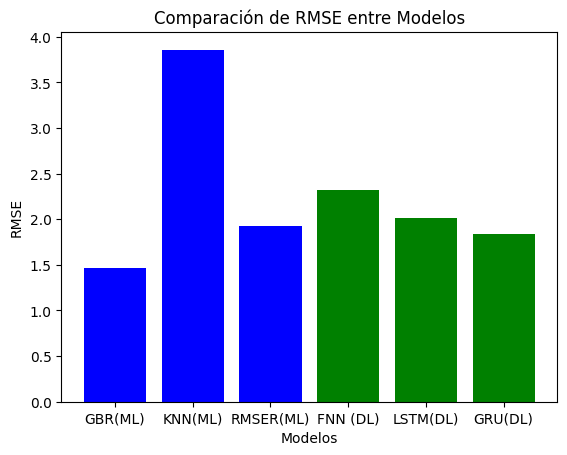

In [ ]:

# mpostrar los modelos utilizados
model_names = ['GBR(ML)', 'KNN(ML)','RMSER(ML)', 'FNN (DL)', 'LSTM(DL)', 'GRU(DL)']

# Mostar los RMSE correspondientes
rmse_values = [RMSEGBR, RMSEKNN, RMSERIDGE, RMSEFNN, BILSTM, RMSEGRU]

# Asignar colores específicos a ML y DL
colors = ['blue', 'blue', 'blue', 'green', 'green', 'green']

# Crear una gráfica de barras
plt.bar(model_names, rmse_values, color=colors)
plt.xlabel('Modelos')
plt.ylabel('RMSE')
plt.title('Comparación de RMSE entre Modelos')
plt.show()
